In [392]:
import pandas as pd
import numpy as np
ruta=r'\Users\Alberto\Documents\Big Data\pirple\raw_data.csv\raw_data.csv'
df=pd.read_csv(ruta)
df
df_p=pd.pivot_table(df,index=['iso_code'],aggfunc=np.max,fill_value=0)
df=df.drop(columns=['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 9'])
df['Deaths %pob']=df['total_deaths']/df['population']
df['Cases %pob']=df['total_cases']/df['population']
df=df.fillna(0)


Text(0.5, 1.0, 'Casos totales en % Población')

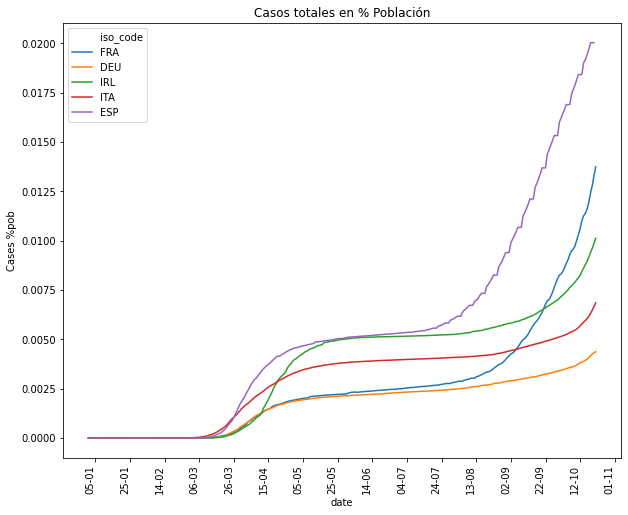

In [313]:
from matplotlib import dates
import matplotlib.pyplot as plt 
import datetime
from matplotlib.dates import DateFormatter, DayLocator
import seaborn as sns

plt.figure(figsize=(10,8))
ax=sns.lineplot(x='date',y='Cases %pob',data=df.query("iso_code==['ESP','FRA','ITA','DEU','IRL']"),hue='iso_code')
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', horizontalalignment='right')
# Define the date format
date_form = dates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(DayLocator(interval=20))
plt.title('Casos totales en % Población')



Text(0.5, 1.0, 'Indice de severidad en las medidas')

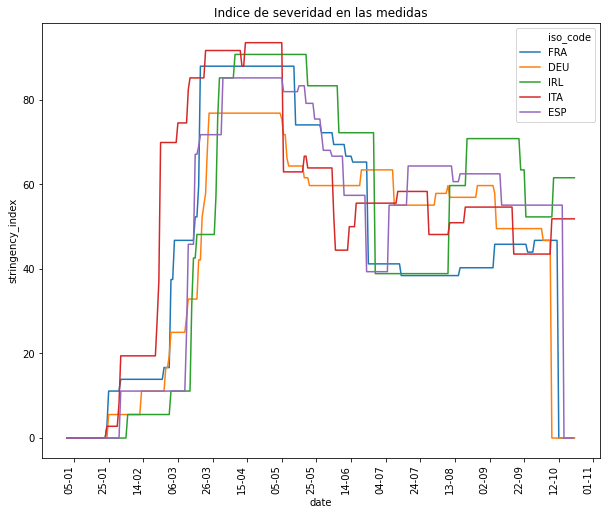

In [314]:
plt.figure(figsize=(10,8))
ax=sns.lineplot(x='date',y='stringency_index',data=df.query("iso_code==['ESP','FRA','ITA','DEU','IRL']"),hue='iso_code')
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', horizontalalignment='right')
# Define the date format
date_form = dates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(DayLocator(interval=20))
plt.title('Indice de severidad en las medidas')




Text(0.5, 1.0, 'Muertes totales en % Población')

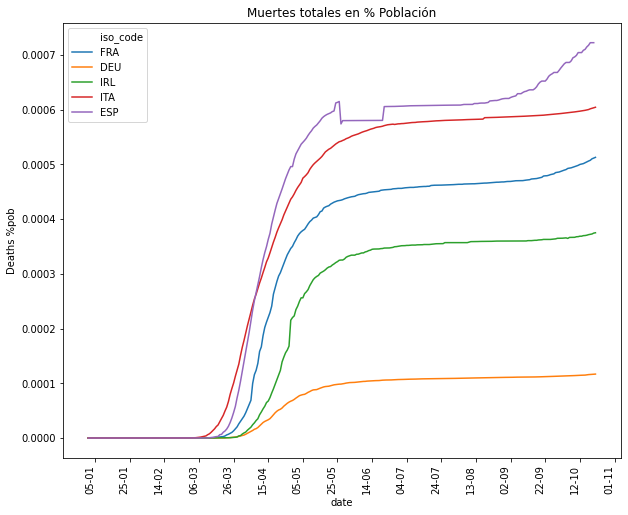

In [315]:
plt.figure(figsize=(10,8))
ax=sns.lineplot(x='date',y='Deaths %pob',data=df.query("iso_code==['ESP','FRA','ITA','DEU','IRL']"),hue='iso_code')
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', horizontalalignment='right')

# Define the date format
date_form = dates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(DayLocator(interval=20))
plt.title('Muertes totales en % Población')

In [387]:
import plotly.express as px
import seaborn as sns

df_string=pd.pivot_table(df,index=['iso_code'],aggfunc='mean')


plt.figure(figsize=(20,10))
df_string=df_string.sort_values(by='stringency_index',ascending=False)[['stringency_index','gdp_per_capita','Cases %pob']]
df_string.head(20)

px.scatter(df_string,x='stringency_index',y='gdp_per_capita',size='Cases %pob',hover_name=df_string.index,color=df_string.index)
#sns.regplot(x='stringency_index',y='Cases %pob',data=df_string)



<Figure size 1440x720 with 0 Axes>

Primero analizamos si las correlaciones son significativas entre las variables. Para ello usamos el indice de correlación de Kendall. 
Vemos cómo la dureza de las restricciones y las muertes totales son significativas y son las que muestran mayor correlación. 

In [316]:

import numpy as np 
from scipy import stats 


def kendall():
    data = df.iloc[:,4:11]

    for i in data.columns:
        for u in data.columns:
            
            if i==u:
                pass
            elif i=='stringency_index':
                x = df[i]
                y=df[u]
                ken=stats.kendalltau(x,y)
                print(ken,i,u)
            
kendall()

KendalltauResult(correlation=0.23528501260814597, pvalue=0.0) stringency_index total_deaths
KendalltauResult(correlation=0.20573570955306186, pvalue=0.0) stringency_index population
KendalltauResult(correlation=0.01762238810861916, pvalue=7.800177329722607e-09) stringency_index gdp_per_capita
KendalltauResult(correlation=0.008987819311435606, pvalue=0.0033000218761211355) stringency_index human_development_index
KendalltauResult(correlation=0.09664898515915439, pvalue=2.770512447319474e-213) stringency_index Deaths %pob
KendalltauResult(correlation=0.03909099799111962, pvalue=6.136876851656429e-38) stringency_index Cases %pob


,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index,Deaths %pob,Cases %pob
total_cases,1.000000,0.911208,0.062395,0.291132,0.074796,0.093868,0.283428,0.269840
total_deaths,0.911208,1.000000,0.077111,0.237207,0.113118,0.132549,0.425498,0.269507
stringency_index,0.062395,0.077111,1.000000,0.083824,-0.020699,0.157166,0.028955,0.002315
population,0.291132,0.237207,0.083824,1.000000,-0.038235,0.072850,-0.016806,-0.046482
gdp_per_capita,0.074796,0.113118,-0.020699,-0.038235,1.000000,0.486213,0.215783,0.283427
human_development_index,0.093868,0.132549,0.157166,0.072850,0.486213,1.000000,0.038662,0.012025
Deaths %pob,0.283428,0.425498,0.028955,-0.016806,0.215783,0.038662,1.000000,0.586142
Cases %pob,0.269840,0.269507,0.002315,-0.046482,0.283427,0.012025,0.586142,1.000000


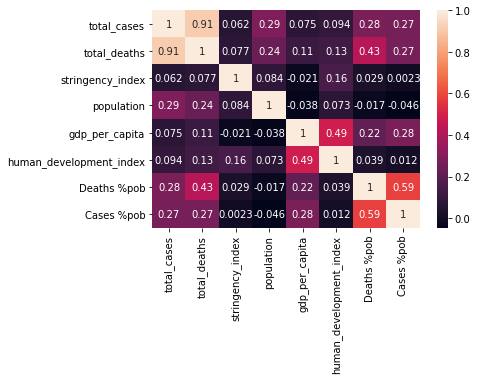

In [317]:
corr=df.corr()
sns.heatmap(corr,annot=True)
corr



In [ ]:
Observamos, a partir de la matriz de correlaciones entre las variables por países, cómo en unos países las medidas de restricción han sido más efectivas que en otros. Tanto en España, como en Irlanda y Reino Unido, las restricciones no han sido muy efectivas para frenar el número de casos. Sin embargo, Francia presenta una ligera correlación negativa, que quiere decir que, ante un aumento en las restricciones, el nº de casos total decrece. Esto no quiere decir que hayan sido mucho más efectivas que en otros países, pues es una correlación muy débil. Sin embargo, en Slovakia sí parece ser que las medidas implementadas tienen una correlación fuerte con el decrecimiento en el nº de casos, con un valor de -0.5. ¿Quiere decir esto que se han tomado medidas más efectivas en unos países que en otros? Parece ser que lo que realmente importa no es la cantidad de medidas restrictivas, sino la efectividad. Aquí también puede haber un sesgo, pues variables como el nivel cultural o la actitud ante el virus de la población influyen mucho a pesar de las medidas tomadas. 

<Figure size 1440x1440 with 0 Axes>

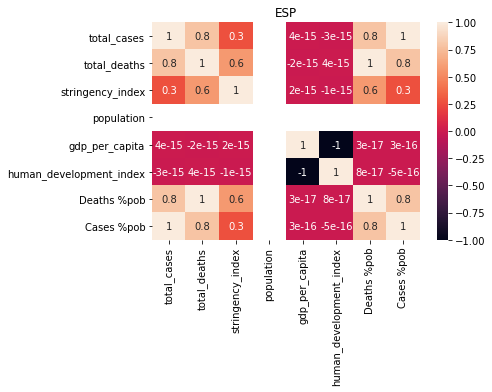

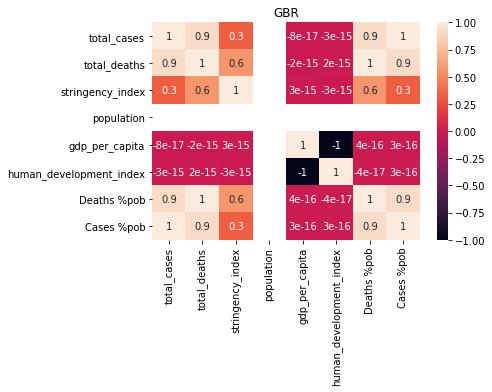

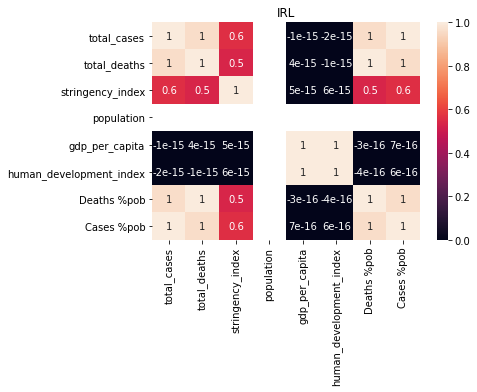

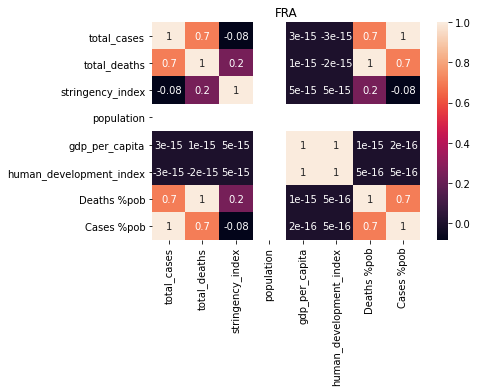

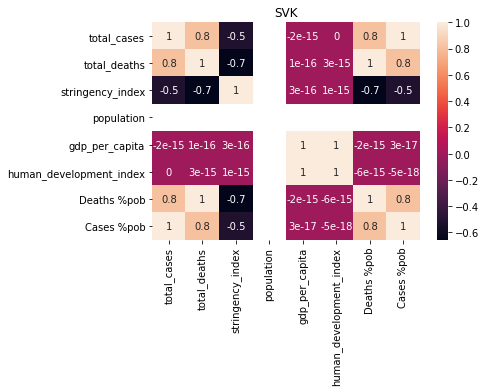

In [389]:
def corr(pais1,pais2,pais3,pais4,pais5):
    

    corr1=df.query(f"iso_code=='{pais1}'").corr()
    corr2=df.query(f"iso_code=='{pais2}'").corr()
    corr3=df.query(f"iso_code=='{pais3}'").corr()
    corr4=df.query(f"iso_code=='{pais4}'").corr()
    corr5=df.query(f"iso_code=='{pais5}'").corr()
    
    
    plt.figure(figsize=(20,20))
    plt.subplots(1)
    sns.heatmap(corr1,annot=True,fmt='.1g',)
    plt.title(f'{pais1}')
    plt.subplots(1)
    sns.heatmap(corr2,annot=True,fmt='.1g',)
    plt.title(f'{pais2}')
    plt.subplots(1)
    sns.heatmap(corr3,annot=True,fmt='.1g',)
    plt.title(f'{pais3}')
    plt.subplots(1)
    sns.heatmap(corr4,annot=True,fmt='.1g',)
    plt.title(f'{pais4}')
    plt.subplots(1)
    sns.heatmap(corr5,annot=True,fmt='.1g',)
    plt.title(f'{pais5}')


corr('ESP','GBR','IRL','FRA','SVK')
